# Research Question: Predictions on California Housing Prices




In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



## Introduction

### Source of Data: 

The data contains information from the 1990 California census.
This dataset is a modified version of the California Housing dataset available from: Luís Torgo's page (University of Porto).
And it is also available in the following URL link:
https://www.kaggle.com/camnugent/california-housing-prices

### Background Information: 

The dataset contains prices for houses found in given California districts and some summary stats about them based on the 1990 census data.
The goal in this analysis is to find out whether there are potential relationships between housing prices and other factors(i.e.house age, median_income, population, etc.), and predict the housing prices in California based on our model.

### Variables Description: 
There are 10 variables in the dataset with the descriptions below:  

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housing_Median_Age: Median age of a house within a block; a lower number is a newer building

4. total_Rooms: Total number of rooms within a block

5. total_Bedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. median_Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. median_House_Value: Median house value for households within a block (measured in US Dollars)

10. ocean_Proximity: Location of the house w.r.t ocean/sea. Values include: NEAR BAY, INLAND, NEAR OCEAN, ISLAND, <1H OCEAN


### Ourtcome(Y) and Predictive Covariates(X):

#### Linear Regression Model:
 Y: median_house_value: Median income for households within a block of houses (measured in tens of thousands of US Dollars)  
 
 X_1: housingMedianAge: Median age of a house within a block; a lower number is a newer building  
 
 X_2: median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)  
 
 X_3: population:  Total number of people residing within a block


#### Camparing price per living space for each city in California:
Y: median_house_value: Median income for households within a block of houses (measured in tens of thousands of US Dollars)  

X: Ocean_proximity: Location of the house w.r.t ocean/sea. Values include: NEAR BAY, INLAND, NEAR OCEAN, ISLAND, <1H OCEAN

## Cleaning Data

First off, we need to clean our data so that we could efficiently analyse them.


In [223]:
df_house = pd.read_csv('C:/Users/amber/Desktop/Eco225/Code/housing.csv')
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [224]:
df_house.shape

(20640, 10)

We have 20640 observations with 10 columns in the dataset.

Then, we need to check if there exists missing values in the dataset.

In [225]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The result shows that there are 207 missing values existing in the "total_bedrooms" column. We want to fill the null values with the median.

In [226]:
## group the data by 20 values each block
df_house["households_gp"] = df_house["households"]//20
## filling the null values with the median
df_house["total_bedrooms"] = df_house["total_bedrooms"].fillna(df_house.groupby("households_gp")["total_bedrooms"].transform("median"))

In [227]:
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
households_gp         0
dtype: int64

Now, we have successfully eliminate the null values.  
But we still have one problem with the dataset: the "median_house_value" represents the median value of one house in a given block. However, some of the variables are representing the statistics for the whole block("total_rooms","total_bedrooms",and "population").Therefore, we want to change these "whole block" statistics into "one house" statistics.

In [228]:
## create new variables that represents for each households:
df_house["rooms_per_household"] = df_house["total_rooms"]/df_house["households"]
df_house["bedrooms_per_household"] = df_house["total_bedrooms"]/df_house["households"]
df_house["population_per_household"] = df_house["population"]/df_house["households"]


In [229]:
## copying the old dataframe and dropping some columns to draw a meaningful summary table:
df_summary = df_house.filter(["housing_median_age","median_income","median_house_value","rooms_per_household",
                      "bedrooms_per_household","population_per_household"], axis = 1)


## Summary Statistics

Now we want to see the statistical details of the dataset.


In [230]:
df_summary.describe()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,3.870671,206855.816909,5.429000,1.096590,3.070655
std,12.585558,1.899822,115395.615874,2.474173,0.473748,10.386050
min,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,18.000000,2.563400,119600.000000,4.440716,1.006504,2.429741
50%,29.000000,3.534800,179700.000000,5.229129,1.048970,2.818116
75%,37.000000,4.743250,264725.000000,6.052381,1.098941,3.282261
max,52.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


The new variables we have created for each households seems problematic: the maximum population per households cannot be 1243.33,bedrooms per household is unlikely to be 34, and rooms per household is over 100.
Thus, we should drop some of the very exaggerated value but still keeping some plausible extreme observations:
we drop all the households whose rooms are more than 50, or whose bedrooms are more than 20, or whose polulation is more than 50.

In [231]:
## check the data out of range；
print(df_house.query("rooms_per_household > 50" ))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1912     -120.16     39.01                16.0       1463.0           264.0   
1913     -120.06     39.01                19.0       2967.0           528.0   
1914     -120.10     38.91                33.0       1561.0           282.0   
1979     -120.08     38.80                34.0       1988.0           511.0   
2395     -119.34     37.12                23.0       1881.0           380.0   
9676     -119.02     37.64                14.0       5919.0          1278.0   
11707    -120.06     39.15                22.0       2213.0           372.0   
11862    -121.25     40.27                25.0        958.0           245.0   
12447    -114.49     33.97                17.0       2809.0           635.0   

       population  households  median_income  median_house_value  \
1912         54.0        26.0         4.9750            206300.0   
1913        112.0        48.0         4.0714            437500.0   
1914 

In [232]:
print(df_house.query("bedrooms_per_household > 20" ))

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1914    -120.10     38.91                33.0       1561.0           282.0   
1979    -120.08     38.80                34.0       1988.0           511.0   

      population  households  median_income  median_house_value  \
1914        30.0        11.0          1.875            500001.0   
1979        36.0        15.0          4.625            162500.0   

     ocean_proximity  households_gp  rooms_per_household  \
1914          INLAND            0.0           141.909091   
1979          INLAND            0.0           132.533333   

      bedrooms_per_household  population_per_household  
1914               25.636364                  2.727273  
1979               34.066667                  2.400000  


In [233]:
print(df_house.query("population_per_household > 50" ))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3364     -120.51     40.41                36.0         36.0             8.0   
9172     -118.59     34.47                 5.0        538.0            98.0   
12104    -117.33     33.97                 8.0        152.0            19.0   
13034    -121.15     38.69                52.0        240.0            44.0   
16420    -121.29     37.89                26.0        161.0            27.0   
16669    -120.70     35.32                46.0        118.0            17.0   
19006    -121.98     38.32                45.0         19.0             5.0   

       population  households  median_income  median_house_value  \
3364       4198.0         7.0         5.5179             67500.0   
9172       8733.0       105.0         4.2391            154600.0   
12104      1275.0        20.0         1.6250            162500.0   
13034      6675.0        29.0         6.1359            225000.0   
16420      1542.0        30

In [234]:
## drop the overly exaggerated outlier；
df_house = df_house.drop([1912,1913,1914,1979,2395,3364,9172,9676,11707,11862,12447,12104,13034,16420,16669,19006]).reset_index(drop = True)

In [235]:
## new summary table:
df_summary2 = df_house.filter(["housing_median_age","median_income","median_house_value","rooms_per_household",
                      "bedrooms_per_household","population_per_household"], axis = 1)

df_summary2.describe()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20624.000000,20624.000000,20624.000000,20624.000000,20624.000000,20624.000000
mean,28.641292,3.870481,206859.326998,5.398546,1.090245,2.937585
std,12.584853,1.899574,115391.058293,1.881275,0.322083,0.942528
min,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,18.000000,2.563400,119600.000000,4.440247,1.006504,2.430205
50%,29.000000,3.534600,179700.000000,5.227934,1.048944,2.818295
75%,37.000000,4.742725,264825.000000,6.051005,1.098836,3.281917
max,52.000000,15.000100,500001.000000,47.515152,11.181818,41.214286


Even though the new maximum values for rooms_per_household, bedrooms_per_household, and population_per_household are still high, but they are more plausible now.

## Relations between Variables in Graphs

After cleaning the data, we would like to dig into the relations between possible independent variables(median_income, population, bedrooms per household, households)and dependent variable(median_house_value):

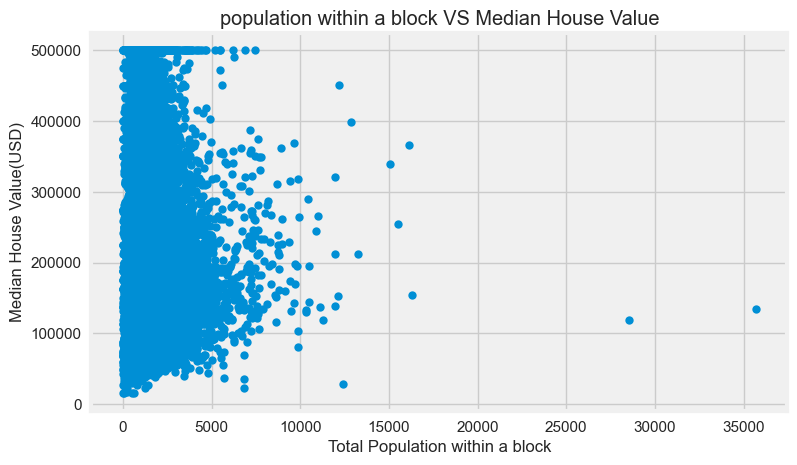

In [236]:
## check the relations bt median_house_value and population:
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='population', y='median_house_value', style='o')
plt.title('population within a block VS Median House Value')
plt.xlabel('Total Population within a block')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

We could see that the most blocks are under 10000 people, and there is no obvious linear relationship between population and median house value.

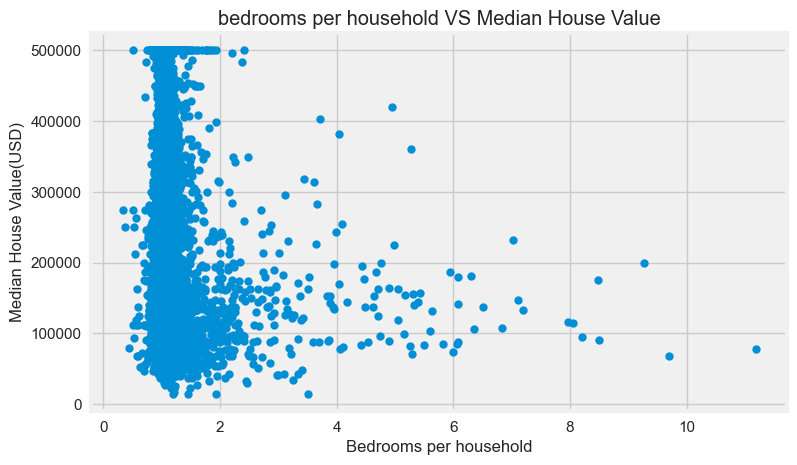

In [237]:
## check the relations bt median_house_value and bedrooms per household:
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='bedrooms_per_household', y='median_house_value', style='o')
plt.title('bedrooms per household VS Median House Value')
plt.xlabel('Bedrooms per household')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

The plot shows the most households have around 1 to 4 bedrooms, and there is no obvious linear relationship between number of bedrooms per household and median house value.

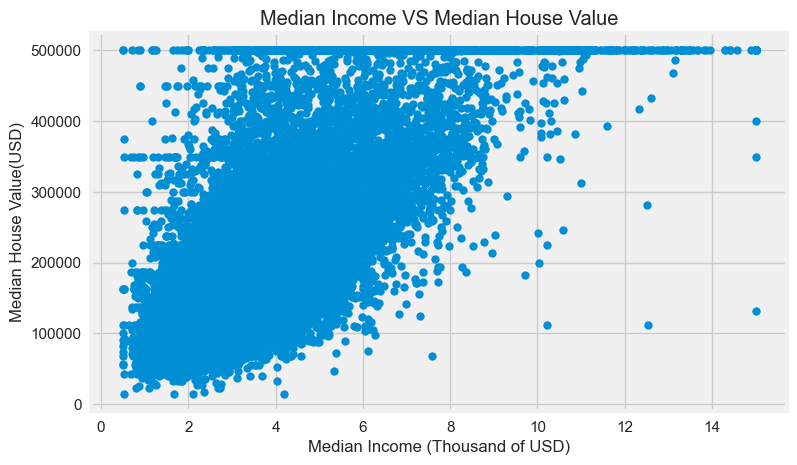

In [238]:
## check the relations bt median_house_value and median_income:
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='median_income', y='median_house_value', style='o')
plt.title('Median Income VS Median House Value')
plt.xlabel('Median Income (Thousand of USD)')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

The plot is likely to show a strong linear relationship between median income and mdeian house value for each block of houses. However, the plot has some issues: there  are some horizontal lines of observations whose median house value are $500,000$, $450,000$, $350,000$, and $275,000$. The median house value in the line of $500,000$ could be problematic since there are very high values(worth more than $500,000$) of the house value but are set to $500,000$. To solve this problem and make the data looks more natural, I will drop these observations. Since our dataset is big enough, dropping those observations (aroung 1% of the total dataset) would be appropriate.

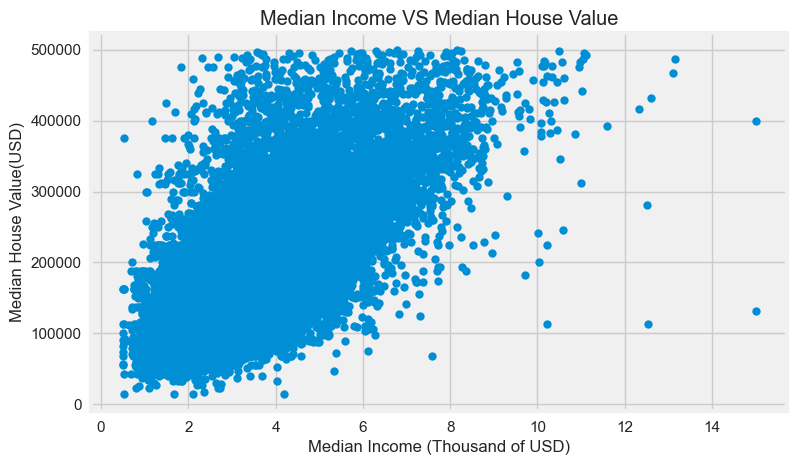

In [239]:
# drop observations in the line of 500,000, 450,000, 350,000, 275,000
df_house.drop(df_house.index[df_house['median_house_value'] >= 500000], inplace = True)
df_house.drop(df_house.index[df_house['median_house_value'] == 450000], inplace = True)
df_house.drop(df_house.index[df_house['median_house_value'] == 350000], inplace = True)
df_house.drop(df_house.index[df_house['median_house_value'] == 275000], inplace = True)
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
df_house.plot(x='median_income', y='median_house_value', style='o')
plt.title('Median Income VS Median House Value')
plt.xlabel('Median Income (Thousand of USD)')
plt.ylabel('Median House Value(USD)')
plt.legend(())
plt.show()

The plot shows a positive median to strong linear relationship between median incom and median house value. We could probably use this relation to do a simple linear regression.

## Method 1: Simple Linear Regression

###  Goal: use simple linear regression to predict the house value(measured in tens of thousands of US Dollars) in California based upon median income(measured in US Dollars) per district. 


### step1: preparing the data

First, we are going to divide the data into attributes and labels, and then use python to divide our data into training and test datasets.


In [246]:
df_house_2 = df_house.drop(['longitude', 'latitude','housing_median_age','total_rooms','total_bedrooms',
               'population', 'ocean_proximity','households_gp','households','rooms_per_household','bedrooms_per_household',
                           'population_per_household'], axis=1)
df_house_2

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20619,1.5603,78100.0
20620,2.5568,77100.0
20621,1.7000,92300.0
20622,1.8672,84700.0


In [247]:
X = df_house_2.iloc[:, :-1].values
y = df_house_2.iloc[:, 1].values

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### step2: calculate coefficients

Then, use the linear regression model to see the optimal coefficients for all the attributes.

In [249]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)

[40688.0412154]


### step3: Interpretation:
The above coefficient result means that for every one unit of change in income, the change in the house value is about 40688.04 dollars
Or in simpler words, if the median income in a block of households increases by 10,000 dollars, they can expect the house value to achieve an increase of 40688.04 dollars compared to the previous house value.

###  step4: Making Predictions:

We make predictions on the test data, and then compare the actual data to the predicted data.

In [250]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,167800.0,215027.197864
1,191100.0,229032.021651
2,186000.0,183864.227097
3,160300.0,215503.247947
4,156300.0,136735.268958
...,...,...
3886,126600.0,176483.416421
3887,186500.0,256691.752069
3888,365900.0,269597.998742
3889,329400.0,173094.102588


### step5: Evaluating the Model:


In [251]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 72968.93497641434


You can see that the value of root mean squared error is 72968.93, which is much greater than 10% of the mean value(206859.33 USD) of the house value in California. This means that our algorithm was not very accurate but can still make reasonably good predictions.

### Potential Questions with prediction:

There are many factors that may have contributed to this inaccuracy:
#### 1.Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
#### 2.Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. 

## Method2: Different plots showing variations of house values based on location


## Histogram of Houses counts based on location

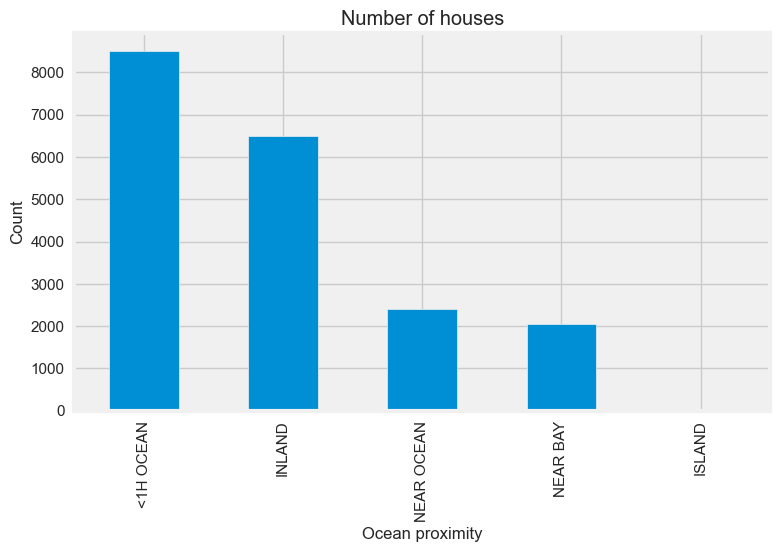

In [253]:
df_house.ocean_proximity.value_counts().plot(kind="bar")
plt.title('Number of houses')
plt.xlabel("Ocean proximity")
plt.ylabel('Count')
plt.show()

#### We could see that the majority of houses located within one hour to the ocean, and there are very little houses built on the island.

## Box plot of House Values based on Location

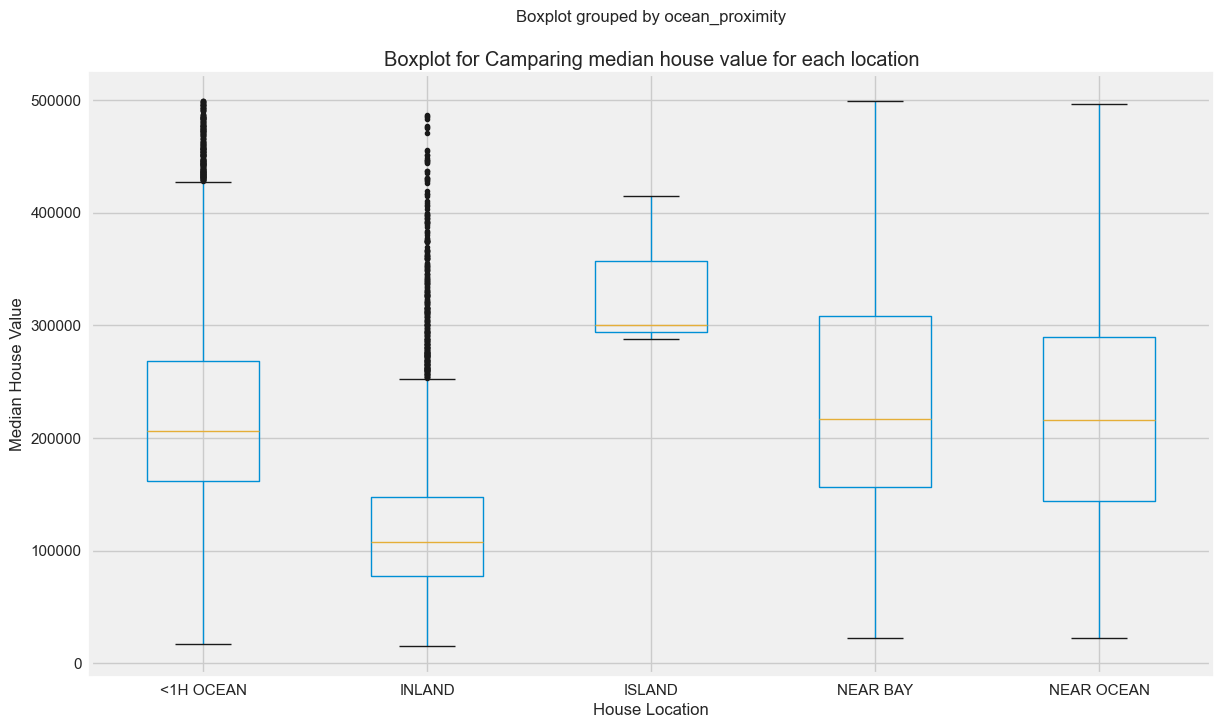

In [257]:
df_house.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(14,8))
plt.title('Boxplot for Camparing median house value for each location')
plt.xlabel("House Location")
plt.ylabel('Median House Value')
plt.show()

In [258]:
df_house.ocean_proximity.value_counts()

<1H OCEAN     8505
INLAND        6497
NEAR OCEAN    2406
NEAR BAY      2042
ISLAND           3
Name: ocean_proximity, dtype: int64

From the boxplots above, we could see that the median house value ranges from 200000 to 250000 dollars for houses located near bay, near ocean, and within one hour to the ocean. 

The houses built on island have higher house values compare to other groups. But there are only 3 houses buit in that area. Thus, it will not massively affect the overall housing price prediction.

However, there are many outliers exists for houses located inland, and a few outliers exists for houses located within one hour to the ocean.And both of these two categories have the most houses built in California. As a result, the outliers does affect our prediction to the house price in California.



## Summary

Based on our simple linear regression model, median income in a block of houses increases by 10,0000 dollars, they can expect the house value to achieve an increase of 40688.04 dollars compared to the previous house value. Investors and households could use income changes to predict the changes in house values.

The histogram and boxplots provides construction companies the information about where to built their houses, and to tells the investors where to buy their targeted houses.